In [ ]:
import cv2
import numpy as np

kernel = np.ones((1, 5), np.uint8)

img = cv2.imread('H:/frame/Jockey_008_8/001.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img_gray, 127,255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

#ret, thresh  = cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY)
#thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, anchor=(2, 0), iterations=5)
#print(ret, thresh)

# 寻找二值化图中的轮廓
#image, contours = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))

cv2.drawContours(img, contours, -1, (0, 0, 0), 3)
# 显示轮廓
cv2.namedWindow('drawContours', 0)
cv2.imshow('drawContours', img)
cv2.waitKey()

224


In [ ]:
import cv2
o=cv2.imread('H:/edge_dection/Jockey_008/LR_bicubic/X8/001.png',cv2.IMREAD_GRAYSCALE)
#o=cv2.imread('H:/frame/Ready_000_8/001.png',cv2.IMREAD_GRAYSCALE)
r1=cv2.Canny(o,10,20,apertureSize=3,L2gradient=True)
r2=cv2.Canny(o,5,20,apertureSize=3,L2gradient=True)
#5,50
contours, hierarchy = cv2.findContours(r2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))

cv2.namedWindow('original', cv2.WINDOW_NORMAL)
cv2.resizeWindow("original", 800, 500)
cv2.namedWindow('result1', cv2.WINDOW_NORMAL)
cv2.resizeWindow("result1", 800, 500)
cv2.namedWindow('result2', cv2.WINDOW_NORMAL)
cv2.resizeWindow("result2", 1200, 800)

cv2.imshow("original",o)
cv2.imshow("result1",r1)
cv2.imshow("result2",r2)
cv2.waitKey()
cv2.destroyAllWindows()

1480


In [4]:
import cv2
#o=cv2.imread('H:/frame/Jockey_008_8/001.png',cv2.IMREAD_GRAYSCALE)
o=cv2.imread('H:/edge_dection/Jockey_008/LR_bicubic/X8/001.png',cv2.IMREAD_GRAYSCALE)
# 图像降噪
lenna = cv2.GaussianBlur(o, (5, 5), 0)
# Canny边缘检测，50为低阈值low，150为高阈值high
canny = cv2.Canny(lenna, 5, 50,apertureSize=3,L2gradient=True)

#寻找二值化图中的轮廓
contours, hierarchy = cv2.findContours(canny, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))

canny = cv2.cvtColor(canny, cv2.COLOR_GRAY2RGB)
#print(canny)

cv2.namedWindow('original', cv2.WINDOW_NORMAL)
cv2.resizeWindow("original", 800, 500)
cv2.namedWindow('canny', cv2.WINDOW_NORMAL)
cv2.resizeWindow("canny", 1200, 800)

cv2.imshow("original",o)
cv2.imshow("canny", canny)
cv2.waitKey()

314


-1

In [5]:
#边缘检测
import cv2
import os

def edge_dection(name,Hpath,Lpath,out_name):
    h=cv2.imread(Hpath,cv2.IMREAD_GRAYSCALE)
    l=cv2.imread(Lpath,cv2.IMREAD_GRAYSCALE)
    # 图像降噪
    lenna1 = cv2.GaussianBlur(h, (5, 5), 0)
    lenna2 = cv2.GaussianBlur(l, (5, 5), 0)
    # Canny边缘检测，50为低阈值low，150为高阈值high
    H= cv2.Canny(lenna1, 5, 20,apertureSize=3,L2gradient=True)#50
    L= cv2.Canny(lenna2, 5, 50,apertureSize=3,L2gradient=True)
    H = cv2.cvtColor(H, cv2.COLOR_GRAY2RGB)
    L = cv2.cvtColor(L, cv2.COLOR_GRAY2RGB)
    cv2.imwrite('H:/edge_dection/'+str(name)+"/HR_edge/"+out_name,H)
    cv2.imwrite('H:/edge_dection/'+str(name)+"/LR_edge/"+out_name,L)
    
name=['Jockey_008','Ready_008']
for i in range(2):
    path='H:/edge_dection/'+str(name[i])+'/HR/'
    print(path)
    for out_name in os.listdir(path):
        #print(name)
        Hpath='H:/edge_dection/'+str(name[i])+"/HR/"+out_name
        Lpath='H:/edge_dection/'+str(name[i])+"/LR_bicubic/X8/"+out_name
        edge_dection(name[i],Hpath,Lpath,out_name)
    

H:/edge_dection/Jockey_008/HR/
H:/edge_dection/Ready_008/HR/


In [30]:
import cv2
import os
#边缘检测
def edge_dection(name,Spath,out_name):
    s=cv2.imread(Hpath,cv2.IMREAD_GRAYSCALE)
    # 图像降噪
    lenna1 = cv2.GaussianBlur(s, (5, 5), 0)
    # Canny边缘检测，50为低阈值low，150为高阈值high
    S= cv2.Canny(lenna1, 5, 20,apertureSize=3,L2gradient=True)
    S = cv2.cvtColor(S, cv2.COLOR_GRAY2RGB)
    #print(S.shape)
    cv2.imwrite('H:/edge_dection/'+str(name)+"/SR_edge/"+out_name,S)
    
name=['Ready_008']
for i in range(2):
    path='H:/edge_dection/'+str(name[i])+'/SR/'
    print(path)
    for out_name in os.listdir(path):
        #print(out_name )
        Hpath='H:/edge_dection/'+str(name[i])+"/SR/"+out_name
        edge_dection(name[i],Hpath,out_name)
    

H:/edge_dection/Ready_008/SR/
(2160, 3840, 3)
(2160, 3840, 3)


IndexError: list index out of range

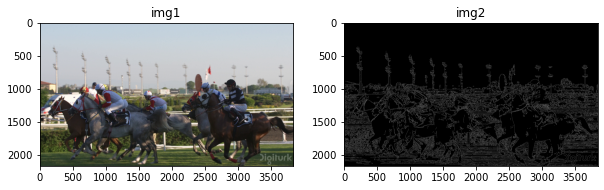

In [12]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
#from skimage.io import imread
#from scipy.fftpack import ifftn, fft2, ifft2
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cmath
import warnings
%matplotlib inline
warnings.filterwarnings(action='ignore')

#读入原始图片
img1 = cv2.imread('H:/edge_dection/Ready_008/SR/001.png')[:,:,::-1]
img2= cv2.imread("H:/edge_dection/Ready_008/HR_edge/001.png")[:,:,::-1]
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("img1")
plt.imshow(img1,cmap=cm.gray)
plt.subplot(1,2,2)
plt.title("img2")
plt.imshow(img2,cmap=cm.gray)
plt.show()


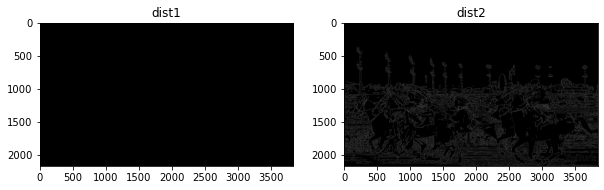

In [15]:
#计算距离转换图像
img1Gray=cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
imgDist1=cv2.distanceTransform(img1Gray, distanceType=cv2.DIST_L2, maskSize=5)
img2Gray=cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
imgDist2=cv2.distanceTransform(img2Gray, distanceType=cv2.DIST_L2, maskSize=5)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(imgDist1, cmap="gray")
plt.title("dist1")

plt.subplot(1,2,2)
plt.imshow(imgDist2, cmap="gray")
plt.title("dist2")
plt.show()

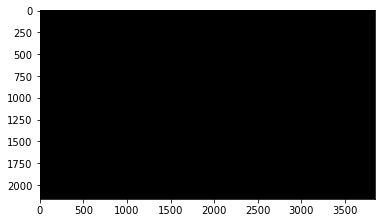

In [8]:
#采用公式alpha=dist1dist1+dist2，计算 Alpha Mask
imgAlpha = imgDist1/(imgDist1+imgDist2+1e-5)
plt.imshow(imgAlpha, cmap="gray")
plt.show()

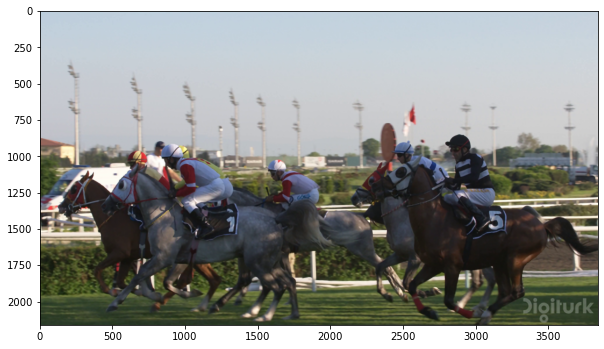

True

In [16]:
#融合两张图像
imgBlend12 = img1.copy()
for c in range(3):
    imgBlend12[:,:,c]=img1[:,:,c] * imgAlpha + img2[:,:,c]*(1-imgAlpha)

plt.figure(figsize=(10,10))
plt.imshow(imgBlend12, cmap="gray")
plt.show()

cv2.imwrite("H:/edge_dection/Ready_008/rong.png", imgBlend12)


#no

In [8]:
# 增强锐度 有用

from PIL import Image,ImageFilter,ImageEnhance
import os
from PIL import ImageGrab
#  源目录
input_path = 'H:\edge_dection\Ready_008\SR'
#  输出目录
output_path = 'H:\edge_dection\Ready_008'

def imageResize(input_path, output_path):
    # 获取输入文件夹中的所有文件/夹，并改变工作空间
    files = os.listdir(input_path)
    os.chdir(input_path)
    # 判断输出文件夹是否存在，不存在则创建
    if (not os.path.exists(output_path)):
        os.makedirs(output_path)
    for file in files:
        # 判断是否为文件，文件夹不操作
        if (os.path.isfile(file)):
            img = Image.open(file)
            # 增强锐度
            sharpness = ImageEnhance.Sharpness(img)
            img = sharpness.enhance(10)

            img.save(os.path.join(output_path, "New_" + file))
imageResize(input_path, output_path)

In [60]:
#图像融合 no 变暗

import cv2
import numpy as np
from PIL import Image

img1 = cv2.imread('H:/edge_dection/Ready_008/SR/001.png')

# 图片背景透明化
def transPNG(srcImageName):
    img = Image.open(srcImageName)
    datas = img.getdata()
    newData = list()
    for item in datas:
        if item[0] > 220 and item[1] > 220 and item[2] > 220:
            newData.append((255, 255, 255, 0))
        else:
            newData.append(item)
    img.putdata(newData)
    return img

img2= transPNG("H:/edge_dection/Ready_008/HR_edge/001.png")
img2= np.array(img2)
#img2=255-img2
#cv2.imwrite('H:/edge_dection/Ready_008/透明001edge.png',img2)
#img2 = Image.open("H:/edge_dection/Ready_008/HR_edge/001.png")#此时读入的数据不是array型的，且size为width，height
#img2= np.array(img2) 
#img2 = cv2.imread('‪H:/edge_dection/Ready_008/HR_edge/001.png',1)
print(img2.shape)
combine = cv2.addWeighted(img1,0.5,img2,0.5,0)
#print(combine)
cv2.imwrite('H:/edge_dection/Ready_008/fusion.png',combine)
'''
cv2.namedWindow('combine', cv2.WINDOW_NORMAL)
cv2.resizeWindow("combine", 800, 500)
cv2.imshow('combine',combine)
cv2.waitKey(0)'''

(2160, 3840, 3)


'\ncv2.namedWindow(\'combine\', cv2.WINDOW_NORMAL)\ncv2.resizeWindow("combine", 800, 500)\ncv2.imshow(\'combine\',combine)\ncv2.waitKey(0)'

In [13]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
#from skimage.io import imread
#from scipy.fftpack import ifftn, fft2, ifft2
import matplotlib.pyplot as plt
import matplotlib.cm as cm

scale =8

img3 = cv2.imread('H:/edge_dection/dog_000/sharp/001.png')[:,:,:]
img4 = cv2.imread('H:/edge_dection/dog_000/LR_bicubic/'+str(scale)+'x/001.png')[:,:,:]

#读入原始图片
img1 = cv2.imread('H:/edge_dection/Ready_008/SR/001.png')[:,:,::-1]
img2= cv2.imread("H:/edge_dection/Ready_008/HR_edge/001.png")[:,:,::-1]

105.0 255.0 150.0 300.0


Text(0.5, 1.0, 'dist1')

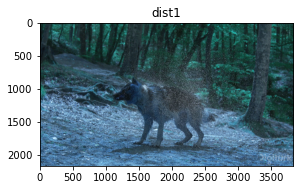

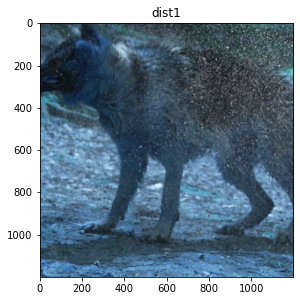

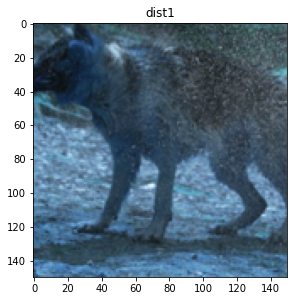

In [14]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img3)
plt.title("dist1")

x1=840#JR120
y1=1200#J1920#R2400
ps=1200

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
img3= img3[x1:x1+ps,y1:y1+ps,:]
cv2.imwrite('H:/edge_dection/dog_000/LR_bicubic/X'+str(scale)+'/1.png',img3)
plt.imshow(img3)
plt.title("dist1")

print(x1/scale,(x1+ps)/scale,y1/scale,(y1+ps)/scale)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
img4= img4[int(x1/scale):int((x1+ps)/scale),int(y1/scale):int((y1+ps)/scale),:]
cv2.imwrite('H:/edge_dection/dog_000/LR_bicubic/X'+str(scale)+'/2.png',img4)
plt.imshow(img4)
plt.title("dist1")

In [ ]:
center = (500,100)
# 泊松融合.no
output1 = cv2.seamlessClone(img1, img2, src_mask, center, cv2.MIXED_CLONE)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(output1, cmap="gray")
plt.title("dist1")


In [20]:
import cv2
import numpy as np,sys
img1= cv2.imread('H:/edge_dection/Ready_008/SR/001.png')
img2= cv2.imread("H:/edge_dection/Ready_008/HR_edge/001.png")
img = cv2.add(img1, img2)
cv2.imwrite('H:/edge_dection/Ready_008/1.jpg',img)


In [33]:
import cv2

img1= cv2.imread('H:/edge_dection/Ready_008/SR/001.png')
img2= cv2.imread("H:/edge_dection/Ready_008/HR_edge/001.png")

# 此处可以控制合成的位置（哪些位置进行改变）
# 这里两幅图一样大，不起作用
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols ]

img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)      # 将图片灰度化

# 灰度图 把 大于175（不感兴趣）的值改为 255 ，也就是变为白色
ret, mask = cv2.threshold(img2gray, 175, 255, cv2.THRESH_BINARY)

# 把mask取反，兴趣区域-->白色   无兴趣区域-->黑色
mask_not = cv2.bitwise_not(mask)#反

# 对张靓颖图片和mask进行取与操作，作用相当于把mask中为黑色的部分，
# 在张靓颖图片中也附黑，白色部分不变。
img1_bg = cv2.bitwise_and(roi,roi,mask = mask)

# 对风景图片和mask_not进行取与操作，作用相当于把mask中为黑色的部分，
# 在风景图片中也附黑，白色部分不变。
img2_fg = cv2.bitwise_and(img2,img2,mask = mask_not)#max

# 相加即可
dst = cv2.add(img1_bg,img2_fg)
roi = dst#有色边缘
cv2.imwrite('H:/edge_dection/Ready_008/1.jpg',roi)

all = cv2.add(img1,roi)
cv2.imwrite('H:/edge_dection/Ready_008/all.jpg',all)

True

In [18]:
import cv2
import numpy as np

img1= cv2.imread('H:/edge_dection/Ready_008/SR/001.png')
img2= cv2.imread("H:/edge_dection/Ready_008/HR_edge/001.png")
#print(img1[:,1000:1050,:],img2[:,1000:1050,:])
'''
with open('H:/edge_dection/Ready_008/data.txt', 'w') as outfile:
    for slice_2d in img2:
        np.savetxt(outfile, slice_2d, fmt = '%f', delimiter = ',')
'''     
img = img1+img2 #no .should use cv2.add()

cv2.imwrite('H:/edge_dection/Ready_008/7.jpg',img)

[[[222 208 194]
  [223 208 194]
  [223 208 194]
  ...
  [222 208 192]
  [222 209 192]
  [223 209 192]]

 [[222 207 193]
  [222 208 193]
  [223 208 193]
  ...
  [222 208 191]
  [222 208 192]
  [222 209 191]]

 [[222 207 193]
  [222 207 193]
  [222 208 193]
  ...
  [221 208 191]
  [222 209 191]
  [222 209 191]]

 ...

 [[ 31  54  38]
  [ 32  54  38]
  [ 33  54  38]
  ...
  [ 34  56  40]
  [ 34  55  40]
  [ 35  55  40]]

 [[ 31  53  37]
  [ 32  54  38]
  [ 33  54  38]
  ...
  [ 34  56  40]
  [ 34  55  40]
  [ 34  54  40]]

 [[ 31  53  37]
  [ 32  54  37]
  [ 33  54  38]
  ...
  [ 34  56  40]
  [ 34  55  40]
  [ 34  54  39]]]


True

In [32]:
import cv2
import os
#边缘检测
def edge_dection(name,Spath,out_name):
    s=cv2.imread(Hpath,cv2.IMREAD_GRAYSCALE)
    # 图像降噪
    lenna1 = cv2.GaussianBlur(s, (5, 5), 0)
    # Canny边缘检测，50为低阈值low，150为高阈值high
    S= cv2.Canny(lenna1, 5, 20,apertureSize=3,L2gradient=True)
    S=255-S#白底黑边
    S = cv2.cvtColor(S, cv2.COLOR_GRAY2RGB)
    #print(S.shape)
    cv2.imwrite('H:/edge_dection/'+str(name)+"/"+out_name,S)
    
name=['Ready_008']
for i in range(1):
    path='H:/edge_dection/'+str(name[i])+'/SR/'
    print(path)
    for out_name in os.listdir(path):
        #print(out_name )
        Hpath='H:/edge_dection/'+str(name[i])+"/SR/"+out_name
        edge_dection(name[i],Hpath,out_name)
    

H:/edge_dection/Ready_008/SR/


In [8]:
import cv2
import numpy as np,sys

#白边
img3= cv2.imread('H:/edge_dection/Ready_008/SR/001.png')
img4= cv2.imread("H:/edge_dection/Ready_008/1.jpg")
img = cv2.addWeighted(img3,0.9,img4,0.1,0) 
cv2.imwrite('H:/edge_dection/Ready_008/2.jpg',img)

#黑边
img3= cv2.imread('H:/edge_dection/Ready_008/SR/001.png')
img4= cv2.imread("H:/edge_dection/Ready_008/001.png")
img = cv2.addWeighted(img3,0.95,img4,0.05,0) 
cv2.imwrite('H:/edge_dection/Ready_008/3.jpg',img)

True

In [62]:
#边缘增强 彩色轮廓，无用
import cv2
import numpy as np,sys
img3= cv2.imread('H:/edge_dection/Ready_008/SR/001.png')
img4= cv2.imread("H:/edge_dection/Ready_008/001.png")

sx = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
sy = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
ix=cv2.filter2D(img3,-1,sx)
iy=cv2.filter2D(img3,-1,sy)
img = cv2.addWeighted(ix,0.5,iy,0.5,0)
#print(img)
cv2.imwrite('H:/edge_dection/Ready_008/4.png',img)

img1= cv2.imread('H:/edge_dection/Ready_008/SR/001.png')
img2= cv2.imread("H:/edge_dection/Ready_008/4.png")
img = cv2.addWeighted(img1,0.9,img2,0.1,0)
#print(img)
cv2.imwrite('H:/edge_dection/Ready_008/5.png',img)

True

In [66]:
#色彩不敏感
import cv2

img1= cv2.imread('H:/edge_dection/Ready_008/SR/001.png')
img2= cv2.imread("H:/edge_dection/Ready_008/rong.png")

b, g, r = cv2.split(img1)
b2, g2, r2 = cv2.split(img2)
Lrgb = 0.2126 * r + 0.7152 * g + 0.0722 * b
A = 1.4749 * (0.2213 * r - 0.3390 * g + 0.1177 * b) + 128
B = 0.6245 * (0.1949 * r + 0.6057 * g - 0.8006 * b) + 128
Lmono = 0.2126 * r2 + 0.7152 * g2 + 0.0722 * b2

Rratio = r / Lrgb
Gratio = g / Lrgb
Bratio = b / Lrgb
R = Rratio * Lmono
G = Gratio * Lmono
B = Bratio * Lmono
img = cv2.merge([B, G, R])

cv2.imwrite('H:/edge_dection/Ready_008/6.png',img)

True

In [69]:
#有用，但不能用轮廓

import cv2
import numpy as n

def guideFilter(I, g, winSize, eps):
    """I:导入的图像， g:引导图像"""
    mean_I = cv2.boxFilter(I, ddepth=-1, ksize=winSize, normalize=1)  # I的均值平滑
    mean_g = cv2.boxFilter(g, ddepth=-1, ksize=winSize, normalize=1)  # g的均值平滑

    mean_gg = cv2.boxFilter(g * g, ddepth=-1, ksize=winSize, normalize=1)  # I*I的均值平滑
    mean_Ig = cv2.boxFilter(I * g, ddepth=-1, ksize=winSize, normalize=1)  # I*g的均值平滑

    var_g = mean_gg - mean_g * mean_g  # 方差
    cov_Ig = mean_Ig - mean_I * mean_g  # 协方差

    a = cov_Ig / (var_g + eps)  # 相关因子a
    b = mean_I - a * mean_g  # 相关因子b

    mean_a = cv2.boxFilter(a, ddepth=-1, ksize=winSize, normalize=1)  # 对a进行均值平滑
    mean_b = cv2.boxFilter(b, ddepth=-1, ksize=winSize, normalize=1)  # 对b进行均值平滑

    out = mean_a * g + mean_b
    return out

In [70]:
def wmap(img1, img2):
    # 权重映射
    data = (img1 == np.maximum(img1, img2)) * 1.0 # X 与 Y 逐位比较取其大者
    return data

def guider_fusion(img1, img2):
    """ 基于导向滤波的融合"""
    img1 = cv2.imread(img1, 1)/255.0
    img2 = cv2.imread(img2, 1)/255.0
 
    # 基层
    base1 = cv2.boxFilter(img1, -1, (31, 31), normalize=1)
    base2 = cv2.boxFilter(img2, -1, (31, 31), normalize=1)

    # 细节层
    detail1 = img1 - base1
    detail2 = img2 - base2

    # 拉普拉斯滤波
    h1 = abs(cv2.Laplacian(img1, -1))
    h2 = abs(cv2.Laplacian(img2, -1))

    # 高斯滤波
    s1 = cv2.GaussianBlur(h1, ksize=(11, 11), sigmaX=5, sigmaY=5)
    s2 = cv2.GaussianBlur(h2, ksize=(11, 11), sigmaX=5, sigmaY=5)


    # 获取权重矩阵
    p1 = wmap(s1, s2)
    p2 = wmap(s2, s1)

    # 导向滤波
    eps1 = 0.3**2
    eps2 = 0.03**2
    wb1 = guideFilter(p1, img1, (8, 8), eps1)
    wb2 = guideFilter(p2, img2, (8, 8), eps1)
    wd1 = guideFilter(p1, img1, (4, 4), eps2)
    wd2 = guideFilter(p2, img2, (4, 4), eps2)

    # 权重归一化
    wbmax = wb1 + wb2
    wdmax = wd1 + wd2
    wb1 = wb1 / wbmax
    wb2 = wb2 / wbmax
    wd1 = wd1 / wdmax
    wd2 = wd2 / wdmax

    # 融合
    B = base1 * wb1 + base2 * wb2
    D = detail1 * wd1 + detail2 * wd2
    im = B + D

    return im

In [74]:
img=guider_fusion('H:/edge_dection/Ready_008/SR/001.png','H:/edge_dection/Ready_008/HR/001.png')
cv2.imwrite('H:/edge_dection/Ready_008/7.png',img)

MemoryError: Unable to allocate 190. MiB for an array with shape (2160, 3840, 3) and data type float64

In [21]:

import cv2
import numpy as n
img1 = cv2.imread('H:/edge_dection/Ready_008/SR/001.png', 1)/255.0#1彩图，0灰度图
img2 = cv2.imread('H:/edge_dection/Ready_008/HR/001.png', 1)/255.0

# 基层
base1 = cv2.boxFilter(img1, -1, (31, 31), normalize=1)#模糊处理
base2 = cv2.boxFilter(img2, -1, (31, 31), normalize=1)
    # 细节层
detail1 = img1 - base1#纹理
detail2 = img2 - base2

    # 拉普拉斯滤波
h1 = abs(cv2.Laplacian(img1, -1))
h2 = abs(cv2.Laplacian(img2, -1))

    # 高斯滤波
s1 = cv2.GaussianBlur(h1, ksize=(11, 11), sigmaX=5, sigmaY=5)
s2 = cv2.GaussianBlur(h2, ksize=(11, 11), sigmaX=5, sigmaY=5)

cv2.imwrite('H:/edge_dection/Ready_008/ex.png',s1 )

[[[1.69236558 1.47104745 1.31057733]
  [1.64170947 1.52989977 1.30916026]
  [1.69680018 1.56000247 1.33285637]
  ...
  [1.42507625 1.49751562 1.22249195]
  [1.51383738 1.48982201 1.1540504 ]
  [1.52071135 1.50615106 1.20546091]]

 [[1.65180087 1.44967589 1.34472681]
  [1.61796733 1.49581822 1.34257397]
  [1.66850845 1.52288737 1.370924  ]
  ...
  [1.41162622 1.49620231 1.243846  ]
  [1.5007015  1.48675484 1.18960333]
  [1.50630049 1.49630006 1.25552141]]

 [[1.68764145 1.37529813 1.30668149]
  [1.65401386 1.41928485 1.3076568 ]
  [1.69706571 1.44814197 1.34509377]
  ...
  [1.44519978 1.45737047 1.26498005]
  [1.53552086 1.44353863 1.21288419]
  [1.52984245 1.44733867 1.25962079]]

 ...

 [[1.18049106 1.32190097 1.37281565]
  [1.19450344 1.31252186 1.34365552]
  [1.24208402 1.31375032 1.31403639]
  ...
  [1.16726313 1.55885342 1.36980175]
  [1.22386953 1.54800841 1.36137402]
  [1.20234371 1.54156556 1.37798652]]

 [[1.19693407 1.32361638 1.29276416]
  [1.20790042 1.31049403 1.26582154]


True

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'dist1')

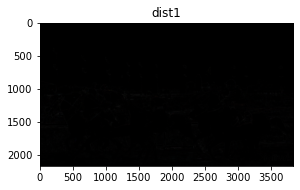

In [2]:
#差值
import cv2
import numpy as np
import matplotlib.pyplot as plt

#由于图像中的元素为numpy.array，其数据类型为uint8,无符号导致负数不能够正确表示
#读入数据的时候对图像进行数据类型转换：.astype(np.int16)
img1 = cv2.imread('H:/edge_dection/Ready_008/SR/001.png').astype(np.int16)#1彩图，0灰度图
img2 = cv2.imread('H:/edge_dection/Ready_008/HR/001.png').astype(np.int16)#
#print(img1,img2)
err = img2-img1   #差值的绝对值
'''
print(err)
cv2.imwrite('H:/edge_dection/Ready_008/err.png',err )
dst = cv2.add(img1,err)
cv2.imwrite('H:/edge_dection/Ready_008/sr+err.png',dst )
'''
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(err, cmap="gray")
plt.title("dist1")

In [2]:
import cv2

img1= cv2.imread('H:/edge_dection/Ready_008/SR/001.png')
img2= cv2.imread("H:/edge_dection/Ready_008/HR_edge/001.png")
#print(img1)
#print(img2)
#max
max = cv2.bitwise_and(img1,img2)#黑底彩边
#print(max)
cv2.imwrite('H:/edge_dection/Ready_008/max.png',max)
#min
#min = cv2.bitwise_and(max,img1)
#cv2.imwrite('H:/edge_dection/Ready_008/min.jpg',min)


True